# Machine Learning Lab 3, College Retention Data

In [76]:
#code123 (for extra credit)
# Imports
import pandas as pd
import numpy as np 
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Question, Phase 1

### How good of a machine learning model can we build to predict student retainment?

-What is the target variable? graduation rate

-Assuming we are able to optimize and make recommendations how does this translate into a business context? Students who stay and graduate make the school more money.

-Prediction problem: Classification or Regression? Regression

-Independent Business Metric: To see if this model is successful we can use the metric of future graduation rates

In [77]:
#read in the college completion dataset, you should have this locally or you can use the URL linking to the class repo below

colcomp = pd.read_csv("C:/Users/Student/Downloads/cc_institution_details.csv", encoding='latin1')

colcomp.info() # Let's check the structure of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   unitid                                3798 non-null   int64  
 1   chronname                             3798 non-null   object 
 2   city                                  3798 non-null   object 
 3   state                                 3798 non-null   object 
 4   level                                 3798 non-null   object 
 5   control                               3798 non-null   object 
 6   basic                                 3798 non-null   object 
 7   hbcu                                  94 non-null     object 
 8   flagship                              50 non-null     object 
 9   long_x                                3798 non-null   float64
 10  lat_y                                 3798 non-null   float64
 11  site             

In [78]:
colcomp = colcomp.drop(
    ['med_sat_value', 'med_sat_percentile', 'long_x', 
     'lat_y', 'site', 'unitid', 'city',
     'nicknames', 'similar'], axis=1)

colcomp.drop(
    columns=colcomp.columns[[1, 9, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 27, 29, 31] + list(range(32, 52))], inplace=True
)
colcomp.head()


,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,NaN,NaN,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,NaN,NaN,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


In [79]:
colcomp['basic'] = colcomp.basic.astype('category')
colcomp['control'] = colcomp.control.astype('category')
colcomp['level'] = colcomp.level.astype('category')
colcomp['flagship']=[1 if colcomp['flagship'][i]=='X' else 0 for i in range(len(colcomp['hbcu']))]
colcomp['flagship'] = colcomp.flagship.astype('category')
colcomp['hbcu']= [1 if colcomp['hbcu'][i]=='X' else 0 for i in range(len(colcomp['hbcu']))]
colcomp['hbcu'] = colcomp.hbcu.astype('category')

colcomp.head()

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,0,0,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,0,0,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,0,0,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


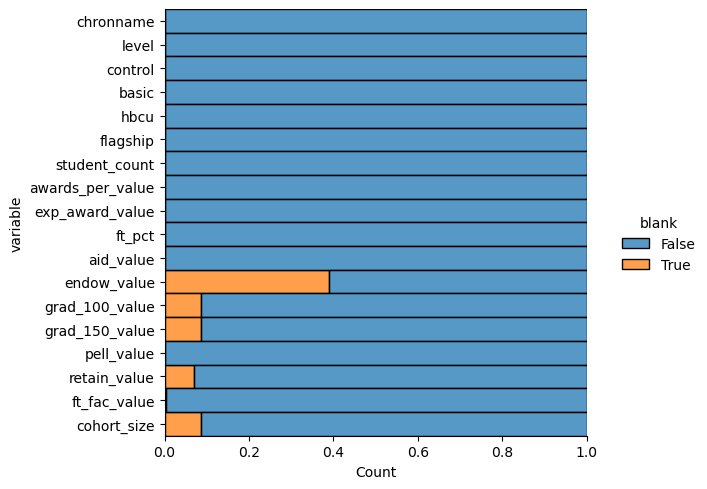

In [80]:
import seaborn as sns
sns.displot(
    data=colcomp.isna().melt(value_name="blank"),
    y="variable",
    hue="blank",
    multiple="fill",
    aspect=1.25
)

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


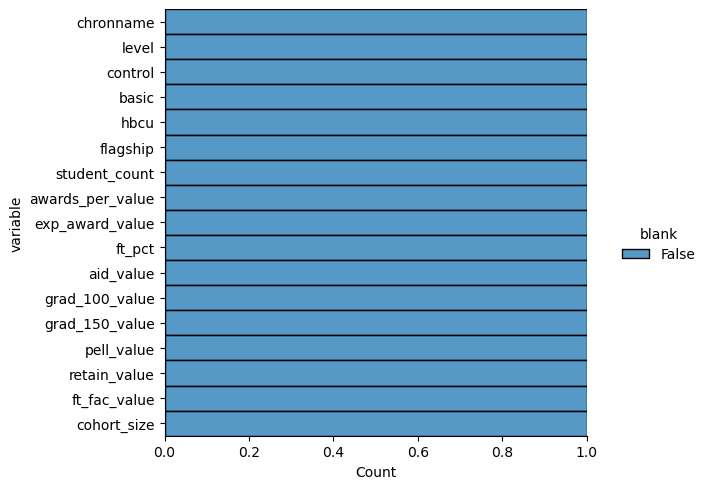

In [81]:
colcomp2 = colcomp.drop(['endow_value'], axis=1)
colcomp2.dropna(axis = 0, how = 'any', inplace = True)
sns.displot(
    data=colcomp2.isna().melt(value_name="blank"),
    y="variable",
    hue="blank",
    multiple="fill",
    aspect=1.25
)

In [82]:
ret_standardizing = StandardScaler().fit_transform(colcomp2[['retain_value']])
ret_standardizing[:10]

array([[-0.22508225],
       [ 0.84412891],
       [-1.82577264],
       [ 0.89415049],
       [-0.28135652],
       [ 1.2693123 ],
       [-1.50063241],
       [-0.21882955],
       [ 1.42562972],
       [ 0.85663431]])

In [83]:
ret_normalizing = MinMaxScaler().fit_transform(colcomp2[['retain_value']])
ret_normalizing[:10]

array([[0.631],
       [0.802],
       [0.375],
       [0.81 ],
       [0.622],
       [0.87 ],
       [0.427],
       [0.632],
       [0.895],
       [0.804]])

<Axes: ylabel='Density'>

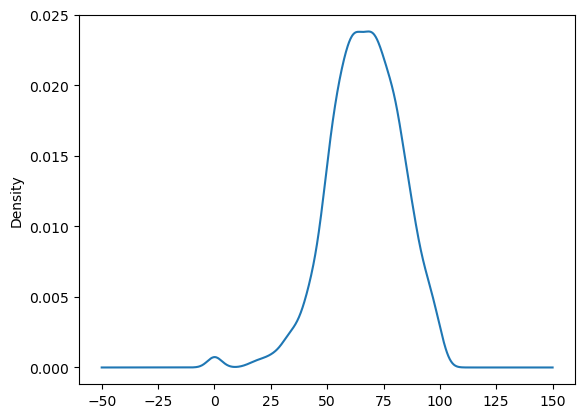

In [84]:
colcomp2.retain_value.plot.density()

<Axes: ylabel='Density'>

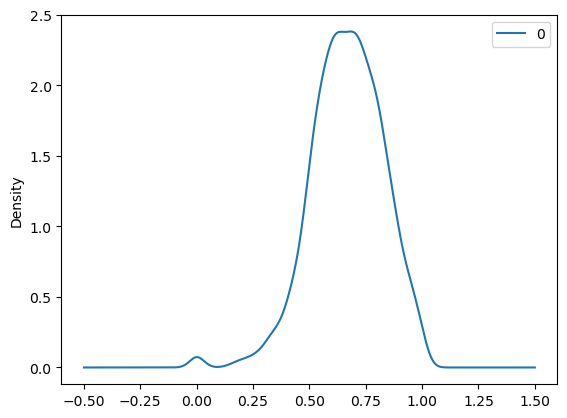

In [85]:
pd.DataFrame(ret_normalizing).plot.density()

In [86]:
num_listing = list(colcomp2.select_dtypes('number')) #select function to find the numeric variables and create a list  

colcomp2[num_listing] = MinMaxScaler().fit_transform(colcomp2[num_listing])
colcomp2

,chronname,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,Alabama A&M University,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,0.828,0.054289
1,University of Alabama at Birmingham,4-year,Public,Research Universities--very high research acti...,0,0,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,0.924,0.084730
2,Amridge University,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,0,0,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,0.672,0.000123
3,University of Alabama at Huntsville,4-year,Public,Research Universities--very high research acti...,0,0,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,0.655,0.046709
4,Alabama State University,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,0.670,0.083190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Keweenaw Bay Ojibwa Community College,2-year,Public,Tribal Colleges,0,0,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,0.286,0.000185
3793,Grace College of Divinity,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,0.107,0.000678
3794,John Paul the Great Catholic University,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,0.444,0.001972
3795,Chamberlain College of Nursing-Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,0,0,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,0.296,0.000431


In [87]:
category_list = list(colcomp2.select_dtypes('category'))
ret_one_hot = pd.get_dummies(colcomp2, columns = category_list) 
ret_one_hot

,chronname,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,...,basic_Schools of art- music- and design,basic_Schools of business and management,basic_Schools of engineering,basic_Schools of law,basic_Theological seminaries- Bible colleges- and other faith-related institutions,basic_Tribal Colleges,hbcu_0,hbcu_1,flagship_0,flagship_1
0,Alabama A&M University,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,...,False,False,False,False,False,False,False,True,True,False
1,University of Alabama at Birmingham,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,...,False,False,False,False,False,False,True,False,True,False
2,Amridge University,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,...,False,False,False,False,False,False,True,False,True,False
3,University of Alabama at Huntsville,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,...,False,False,False,False,False,False,True,False,True,False
4,Alabama State University,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,Keweenaw Bay Ojibwa Community College,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,...,False,False,False,False,False,True,True,False,True,False
3793,Grace College of Divinity,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,...,False,False,False,False,False,False,True,False,True,False
3794,John Paul the Great Catholic University,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,...,False,False,False,False,False,False,True,False,True,False
3795,Chamberlain College of Nursing-Missouri,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,...,False,False,False,False,False,False,True,False,True,False


count    3371.000000
mean        0.666998
std         0.159955
min         0.000000
25%         0.564000
50%         0.671000
75%         0.781000
max         1.000000
Name: retain_value, dtype: float64

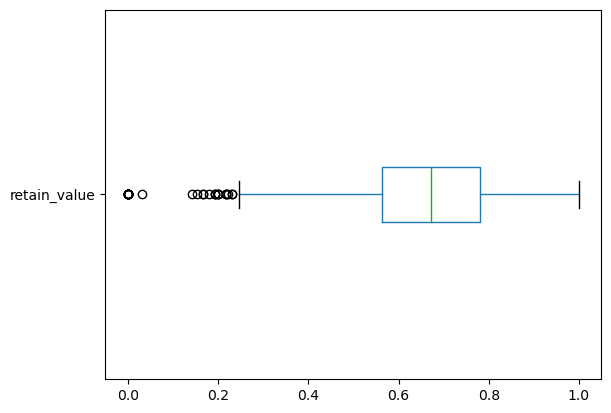

In [88]:
ret_one_hot.boxplot(column= 'retain_value', vert= False, grid=False)
ret_one_hot.retain_value.describe()

In [89]:
ret_one_hot['retain_value_f'] = pd.cut(ret_one_hot.retain_value, bins = [-1,0.781,1], labels =[0,1])
prevalence = ret_one_hot.retain_value_f.value_counts()[1]/len(ret_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [90]:
new_ret = ret_one_hot.drop(['chronname','retain_value'],axis=1)

In [91]:
Train, Test = train_test_split(new_ret,  train_size = 55, stratify = new_ret.retain_value_f)
print(Train.shape)
print(Test.shape) 

(55, 53)
(3316, 53)


In [92]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.retain_value_f)
print(Train.retain_value_f.value_counts())
print(14/(14+41))

retain_value_f
0    41
1    14
Name: count, dtype: int64
0.2545454545454545


In [93]:
print(Tune.retain_value_f.value_counts())
print(104/(310+104))

retain_value_f
0    1245
1     413
Name: count, dtype: int64
0.25120772946859904


In [94]:
print(Test.retain_value_f.value_counts())
print(105/(310+105))

retain_value_f
0    1245
1     413
Name: count, dtype: int64
0.25301204819277107


## Job Placement Data

### How good of a machine learning model can we build to predict job placement?

-What is the target variable? Employability percentage

-Assuming we are able to optimize and make recommendations how does this translate into a business context? Placement of jobs directly impacts how well a job functions

-Prediction problem: Classification or Regression? regression

-Independent Business Metric: To see if this model is successful we can use the metric of status.

In [95]:
#code123
placement = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [96]:
placement = placement.rename(
    columns =
        {
        'sl_no': 'Serial Number',
        'ssc_p': 'Secondary Education Percentage 10th Grade',
        'ssc_b': 'Secondary Board of Education - Central/Others',
        'hsc_p': 'Higher Secondary Education Percentage 12th Grade',
        'hsc_b': 'Higher Board of Education - Central/Others',
        'hsc_s': 'Specialization in Higher Secondary Ed',
        'degree_p': 'Degree Percentage Complete',
        'degree_t': 'Undergraduate Degree Type',
        'workex': 'Work Experience',
        'etest_p': 'Employability Test Percentage',
        'specialisation': 'Post Graduation',
        'mba_p': 'MBA Percentage',
        'status': 'Status of Placement'
})
placement = placement.drop(['Serial Number'], axis=1)
placement.salary = placement.salary.fillna(0)
placement

,gender,Secondary Education Percentage 10th Grade,Secondary Board of Education - Central/Others,Higher Secondary Education Percentage 12th Grade,Higher Board of Education - Central/Others,Specialization in Higher Secondary Ed,Degree Percentage Complete,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduation,MBA Percentage,Status of Placement,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [108]:
placement['gender'] = placement['gender'].astype('category')
placement['Status of Placement'] = placement['Status of Placement'].astype('category')
placement['Secondary Board of Education - Central/Others'] = placement['Secondary Board of Education - Central/Others'].astype('category')
placement['Higher Board of Education - Central/Others'] = placement['Higher Board of Education - Central/Others'].astype('category')
placement['Specialization in Higher Secondary Ed'] = placement['Specialization in Higher Secondary Ed'].astype('category')
placement['Undergraduate Degree Type'] = placement['Undergraduate Degree Type'].astype('category')
placement['Work Experience'] = placement['Work Experience'].astype('category')
placement['Post Graduation'] = placement['Post Graduation'].astype('category')
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   gender                                            215 non-null    category
 1   Secondary Education Percentage 10th Grade         215 non-null    float64 
 2   Secondary Board of Education - Central/Others     215 non-null    category
 3   Higher Secondary Education Percentage 12th Grade  215 non-null    float64 
 4   Higher Board of Education - Central/Others        215 non-null    category
 5   Specialization in Higher Secondary Ed             215 non-null    category
 6   Degree Percentage Complete                        215 non-null    float64 
 7   Undergraduate Degree Type                         215 non-null    category
 8   Work Experience                                   215 non-null    category
 9   Employabil

c:\Users\Student\miniconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


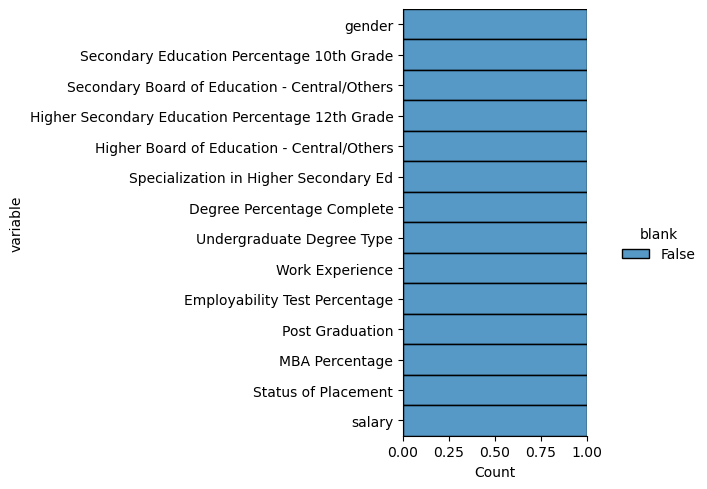

In [109]:
import seaborn as sns
sns.displot(
    data=placement.isna().melt(value_name="blank"),
    y="variable",
    hue="blank",
    multiple="fill",
    aspect=1.25
)

In [110]:
placement.isna().sum()


gender                                              0
Secondary Education Percentage 10th Grade           0
Secondary Board of Education - Central/Others       0
Higher Secondary Education Percentage 12th Grade    0
Higher Board of Education - Central/Others          0
Specialization in Higher Secondary Ed               0
Degree Percentage Complete                          0
Undergraduate Degree Type                           0
Work Experience                                     0
Employability Test Percentage                       0
Post Graduation                                     0
MBA Percentage                                      0
Status of Placement                                 0
salary                                              0
dtype: int64

In [111]:
placement1 = placement.loc[placement.notna().all(axis='columns')]


<Axes: ylabel='Density'>

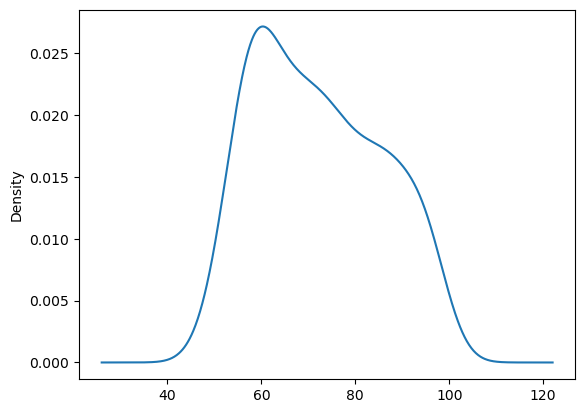

In [112]:
employ_scaler = StandardScaler().fit_transform(placement1[['Employability Test Percentage']])
placement1['Employability Test Percentage'].plot.density()


<Axes: ylabel='Density'>

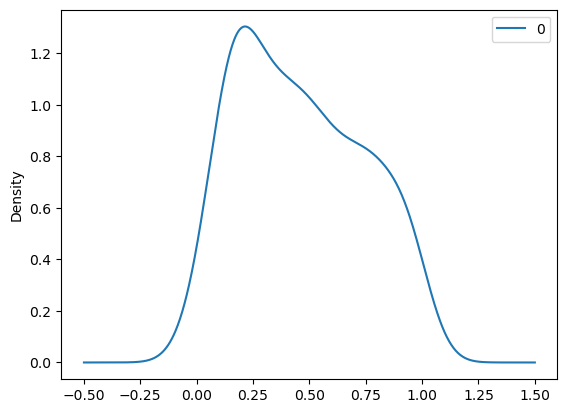

In [113]:
employ_normalizing = MinMaxScaler().fit_transform(placement1[['Employability Test Percentage']])
pd.DataFrame(employ_normalizing).plot.density()

In [114]:
num_listing1 = list(placement1.select_dtypes('number')) #select function to find the numeric variables and create a list  

placement1[num_listing1] = MinMaxScaler().fit_transform(placement1[num_listing1])
placement1

,gender,Secondary Education Percentage 10th Grade,Secondary Board of Education - Central/Others,Higher Secondary Education Percentage 12th Grade,Higher Board of Education - Central/Others,Specialization in Higher Secondary Ed,Degree Percentage Complete,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduation,MBA Percentage,Status of Placement,salary
0,M,0.538240,Others,0.889621,Others,Commerce,0.195122,Sci&Tech,No,0.104167,Mkt&HR,0.284483,Placed,0.287234
1,M,0.792414,Central,0.680890,Others,Science,0.670244,Sci&Tech,Yes,0.760417,Mkt&Fin,0.564843,Placed,0.212766
2,M,0.497011,Central,0.510708,Central,Arts,0.341463,Comm&Mgmt,No,0.520833,Mkt&Fin,0.247001,Placed,0.265957
3,M,0.311482,Central,0.247117,Central,Science,0.048780,Sci&Tech,No,0.333333,Mkt&HR,0.308096,Not Placed,0.000000
4,M,0.925788,Central,0.602965,Central,Commerce,0.568293,Comm&Mgmt,No,0.975000,Mkt&Fin,0.160795,Placed,0.452128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,0.818594,Others,0.741351,Others,Commerce,0.673171,Comm&Mgmt,No,0.854167,Mkt&Fin,0.872564,Placed,0.425532
211,M,0.352711,Others,0.378913,Others,Science,0.536585,Sci&Tech,No,0.500000,Mkt&Fin,0.090330,Placed,0.292553
212,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Comm&Mgmt,Yes,0.187500,Mkt&Fin,0.693778,Placed,0.313830
213,F,0.682540,Others,0.477759,Others,Commerce,0.195122,Comm&Mgmt,No,0.416667,Mkt&HR,0.338081,Placed,0.217021


In [115]:
#one-hot encoding
category_list1 = list(placement1.select_dtypes('category'))

employ_one_hot1 = pd.get_dummies(placement1, columns = category_list1) 
employ_one_hot1

,Secondary Education Percentage 10th Grade,Higher Secondary Education Percentage 12th Grade,Degree Percentage Complete,Employability Test Percentage,MBA Percentage,salary,gender_F,gender_M,Secondary Board of Education - Central/Others_Central,Secondary Board of Education - Central/Others_Others,...,Specialization in Higher Secondary Ed_Science,Undergraduate Degree Type_Comm&Mgmt,Undergraduate Degree Type_Others,Undergraduate Degree Type_Sci&Tech,Work Experience_No,Work Experience_Yes,Post Graduation_Mkt&Fin,Post Graduation_Mkt&HR,Status of Placement_Not Placed,Status of Placement_Placed
0,0.538240,0.889621,0.195122,0.104167,0.284483,0.287234,False,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,0.792414,0.680890,0.670244,0.760417,0.564843,0.212766,False,True,True,False,...,True,False,False,True,False,True,True,False,False,True
2,0.497011,0.510708,0.341463,0.520833,0.247001,0.265957,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
3,0.311482,0.247117,0.048780,0.333333,0.308096,0.000000,False,True,True,False,...,True,False,False,True,True,False,False,True,True,False
4,0.925788,0.602965,0.568293,0.975000,0.160795,0.452128,False,True,True,False,...,False,True,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.818594,0.741351,0.673171,0.854167,0.872564,0.425532,False,True,False,True,...,False,True,False,False,True,False,True,False,False,True
211,0.352711,0.378913,0.536585,0.500000,0.090330,0.292553,False,True,False,True,...,True,False,False,True,True,False,True,False,False,True
212,0.538240,0.494234,0.560976,0.187500,0.693778,0.313830,False,True,False,True,...,False,True,False,False,False,True,True,False,False,True
213,0.682540,0.477759,0.195122,0.416667,0.338081,0.217021,True,False,False,True,...,False,True,False,False,True,False,False,True,False,True


count    215.000000
mean       0.460428
std        0.276582
min        0.000000
25%        0.208333
50%        0.437500
75%        0.697917
max        1.000000
Name: Employability Test Percentage, dtype: float64

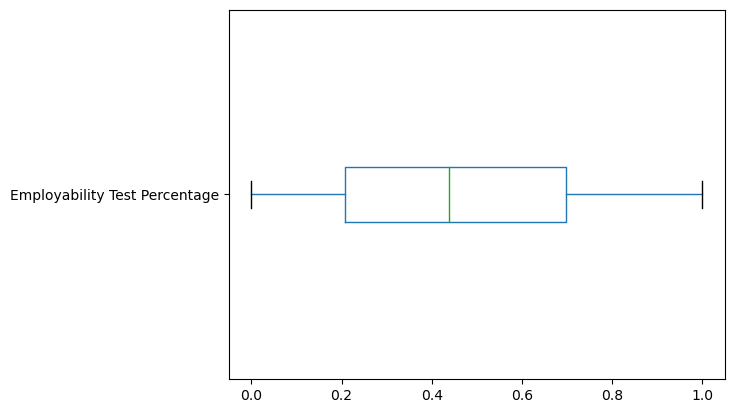

In [124]:
employ_one_hot1.boxplot(column= 'Employability Test Percentage', vert= False, grid=False)
employ_one_hot1['Employability Test Percentage'].describe()

In [118]:
employ_one_hot1['Employability Test Percentage_f'] = pd.cut(employ_one_hot1['Employability Test Percentage'], bins = [-1,0.697917,1], labels =[0,1])
prevalence1 = employ_one_hot1['Employability Test Percentage_f'].value_counts()[1]/len(employ_one_hot1['Employability Test Percentage_f'])
prevalence1

0.25116279069767444

In [120]:
new_employ = employ_one_hot1.drop(['Employability Test Percentage'],axis=1)

In [122]:
Train, Test = train_test_split(new_employ,  train_size = 55, stratify = new_employ['Employability Test Percentage_f'])
print(Train.shape)
print(Test.shape) 

(55, 24)
(160, 24)


In [123]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test['Employability Test Percentage_f'])
print(Train['Employability Test Percentage_f'].value_counts())
print(Tune['Employability Test Percentage_f'].value_counts())
print(Test['Employability Test Percentage_f'].value_counts())

Employability Test Percentage_f
0    41
1    14
Name: count, dtype: int64
Employability Test Percentage_f
0    60
1    20
Name: count, dtype: int64
Employability Test Percentage_f
0    60
1    20
Name: count, dtype: int64
